## [2]

In [1]:
import sympy
x = sympy.symbols('x')

In [2]:
def f(x): 
    return x**4 + 4*x**3 - 79*x**2 -226*x + 720
f(x)

x**4 + 4*x**3 - 79*x**2 - 226*x + 720

### (2.1)

In [3]:
# 一次微分
def f1(x): 
    return f(x).diff(x)
f1(x)

4*x**3 + 12*x**2 - 158*x - 226

In [4]:
# 二次微分
def f2(x): 
    return f1(x).diff(x)
f2(x)

12*x**2 + 24*x - 158

### (2.2)

In [5]:
from scipy import optimize

def f(x, sign=1):
        return sign*(x**4 + 4*x**3 - 79*x**2 -226*x + 720)

In [6]:
Result1 = optimize. minimize_scalar(f)
Result1.x

5.688982984264878

In [7]:
Result1.fun

-1338.5602025692729

In [8]:
f(Result1.x)

-1338.5602025692729

In [9]:
Result2 = optimize.fminbound(f, -10, 0)
Result2

-7.334997398323001

In [10]:
f(Result2)

-556.543641549833

### (2.3)

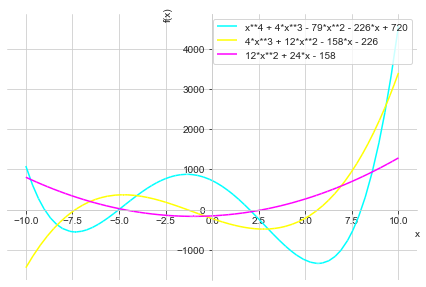

In [11]:
import seaborn as sb
sb.set_style('whitegrid')

p= sympy.plotting.plot(f(x),f1(x),f2(x),(x,-10,10), show=False)
p[0].line_color='cyan'
p[1].line_color='yellow'
p[2].line_color='magenta'
p.legend=True
p.show()

## [3]

### (3.1)

In [12]:
import sympy as sm

In [13]:
x,y = sm.symbols('x,y')

z = (x-10)*(x-1)*(x+12)*(y-10)*(y-1)*(y+12)
z.expand() 

x**3*y**3 + x**3*y**2 - 122*x**3*y + 120*x**3 + x**2*y**3 + x**2*y**2 - 122*x**2*y + 120*x**2 - 122*x*y**3 - 122*x*y**2 + 14884*x*y - 14640*x + 120*y**3 + 120*y**2 - 14640*y + 14400

In [14]:
dzx = z.diff(x)
dzx

(x - 10)*(x - 1)*(y - 10)*(y - 1)*(y + 12) + (x - 10)*(x + 12)*(y - 10)*(y - 1)*(y + 12) + (x - 1)*(x + 12)*(y - 10)*(y - 1)*(y + 12)

In [15]:
dzy = z.diff(y)
dzy

(x - 10)*(x - 1)*(x + 12)*(y - 10)*(y - 1) + (x - 10)*(x - 1)*(x + 12)*(y - 10)*(y + 12) + (x - 10)*(x - 1)*(x + 12)*(y - 1)*(y + 12)

In [16]:
eq1 = sm.Eq(dzx, 0)
eq2 = sm.Eq(dzy, 0)

eq1

Eq((x - 10)*(x - 1)*(y - 10)*(y - 1)*(y + 12) + (x - 10)*(x + 12)*(y - 10)*(y - 1)*(y + 12) + (x - 1)*(x + 12)*(y - 10)*(y - 1)*(y + 12), 0)

In [17]:
eq2

Eq((x - 10)*(x - 1)*(x + 12)*(y - 10)*(y - 1) + (x - 10)*(x - 1)*(x + 12)*(y - 10)*(y + 12) + (x - 10)*(x - 1)*(x + 12)*(y - 1)*(y + 12), 0)

### (3.2)

In [18]:
sol = sm.solve([eq1, eq2], x, y,  
         dict=True,
        ) 
sol

[{x: -12, y: -12},
 {x: -12, y: 1},
 {x: -12, y: 10},
 {x: 1, y: -12},
 {x: 1, y: 1},
 {x: 1, y: 10},
 {x: 10, y: -12},
 {x: 10, y: 1},
 {x: 10, y: 10},
 {x: -1/3 + sqrt(367)/3, y: -1/3 + sqrt(367)/3},
 {x: -1/3 + sqrt(367)/3, y: -sqrt(367)/3 - 1/3},
 {x: -sqrt(367)/3 - 1/3, y: -1/3 + sqrt(367)/3},
 {x: -sqrt(367)/3 - 1/3, y: -sqrt(367)/3 - 1/3}]

In [19]:
len(sol)

13

### (3.3)

In [20]:
from mpl_toolkits import mplot3d

def f(x,y): 
    zx = (x-10)*(x-1)*(x+12) 
    zy = (y-10)*(y-1)*(y+12) 
    z = zx*zy 
    return z 

x,y = sm.symbols('x,y') 
z = f(x,y) 

%matplotlib qt 

q = sm.plotting.plot3d(
   z,
   (x,-10,10),
   (y,-10,10),
   xlabel= 'x',
   ylabel= 'y',
   title= f'z= f(x,y)= {z}',
   show=False) 

q.show() 